<a href="https://colab.research.google.com/github/rotoncsedu/DL/blob/main/cnn_img_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
from matplotlib import pyplot as plt
import numpy as np

In [26]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [27]:
X_test.shape

(10000, 32, 32, 3)

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
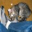

In [28]:
X_test[0]

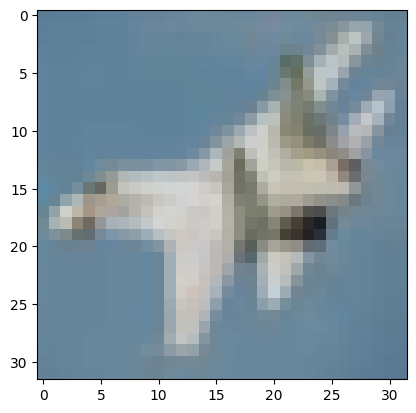

In [29]:
plt.imshow(X_test[10])

In [30]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [31]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [32]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [33]:
def plt_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

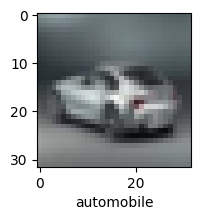

In [34]:
plt_sample(X_train,y_train,250)

In [35]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [36]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 84ms/step - accuracy: 0.3026 - loss: 1.9335
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 147s 87ms/step - accuracy: 0.4249 - loss: 1.6384
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.4532 - loss: 1.5532
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.4749 - loss: 1.4928
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 85ms/step - accuracy: 0.4949 - loss: 1.4331


In [40]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.45      0.53      1000
           1       0.46      0.80      0.58      1000
           2       0.37      0.34      0.35      1000
           3       0.34      0.43      0.38      1000
           4       0.38      0.47      0.42      1000
           5       0.52      0.19      0.27      1000
           6       0.48      0.58      0.53      1000
           7       0.64      0.47      0.55      1000
           8       0.53      0.70      0.61      1000
           9       0.65      0.36      0.47      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [39]:
## Now apply CNN

In [41]:
cnn = models.Sequential( [
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    #Dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.3711 - loss: 1.7400
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.5684 - loss: 1.2310
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6267 - loss: 1.0618
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6576 - loss: 0.9813
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.6753 - loss: 0.9222


In [46]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.71      0.70      1000
           1       0.74      0.80      0.77      1000
           2       0.58      0.53      0.55      1000
           3       0.48      0.49      0.49      1000
           4       0.62      0.62      0.62      1000
           5       0.60      0.55      0.58      1000
           6       0.77      0.74      0.75      1000
           7       0.74      0.68      0.71      1000
           8       0.77      0.79      0.78      1000
           9       0.69      0.78      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



In [47]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

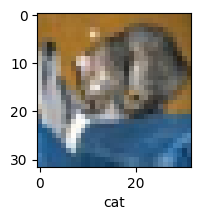

In [50]:
plt_sample(X_test,y_test,0)

In [53]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[7.9890639e-03, 7.1738433e-04, 6.2701027e-03, 6.0273808e-01,
        1.2312180e-02, 2.2147515e-01, 1.1370218e-02, 4.4003869e-03,
        1.2977339e-01, 2.9540774e-03],
       [1.0262815e-02, 1.2783448e-01, 3.7691395e-06, 3.3951173e-06,
        2.5238937e-06, 4.1391851e-07, 5.3094816e-08, 1.0657973e-06,
        8.3859015e-01, 2.3301424e-02],
       [5.7183448e-02, 3.1626478e-01, 4.0900796e-03, 5.8275103e-03,
        2.6141007e-03, 2.1333594e-03, 5.7258812e-04, 2.0657517e-03,
        5.5955541e-01, 4.9692929e-02],
       [1.8513833e-01, 1.7849771e-02, 9.5821889e-03, 1.9685728e-04,
        1.8518347e-03, 6.9378497e-05, 1.5894382e-04, 8.9688481e-05,
        7.8413379e-01, 9.2910830e-04],
       [8.7146916e-05, 2.2108968e-04, 3.5746489e-02, 5.1257715e-02,
        3.3482292e-01, 2.7772186e-02, 5.4638225e-01, 1.3350450e-05,
        3.6274875e-03, 6.9415008e-05]], dtype=float32)

In [54]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(6)]

In [55]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

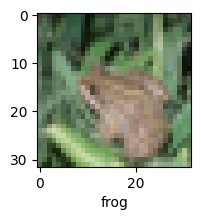

In [59]:
plt_sample(X_test,y_test,4)

In [60]:
classes[y_classes[4]]

'frog'